In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from keras.datasets import mnist

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [35]:
print(X_train.shape)
X_train[:2]

(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [13]:
# LeNet Architecture
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [15]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [25]:
history=model.fit(X_train,y_train,epochs=4,validation_data=(X_test,y_test))

Epoch 1/4
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0178 - Accuracy: 0.9941 - val_loss: 0.0333 - val_Accuracy: 0.9897
Epoch 2/4
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0160 - Accuracy: 0.9944 - val_loss: 0.0408 - val_Accuracy: 0.9875
Epoch 3/4
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0145 - Accuracy: 0.9955 - val_loss: 0.0450 - val_Accuracy: 0.9863
Epoch 4/4
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0146 - Accuracy: 0.9951 - val_loss: 0.0409 - val_Accuracy: 0.9891


In [26]:
y_prob = model.predict(X_test).argmax(axis=1)
y_prob

313/313 [==============================] - 2s 8ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [27]:
print(y_test.shape,y_prob.shape)

(10000,) (10000,)


In [28]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(y_test,y_prob)

0.9891

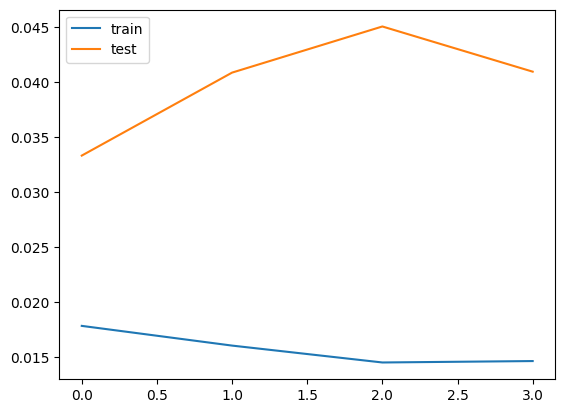

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [36]:
import pickle
pickle.dump(model,open('LeNet5_Achitecture_on_mnist.pkl','wb'))